In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_theme(style="whitegrid")

plt.rcParams['figure.figsize'] = (10, 6)

In [41]:

columns_to_load = [
    "Местное время в Перми", "T", "Po", "U", "Ff", "N", "H", "VV"
]

new_column_names = {
    "Местное время в Перми": "time",
    "T": "temperature",
    "Po": "pressure",
    "U": "humidity",
    "Ff": "wind_speed",
    "N": "cloudiness",
    "H": "cloud_height",
    "VV": "visibility"
}

try:

    df_weather = pd.read_csv('data/weather1.csv', sep=';', usecols=columns_to_load)
    df_weather.rename(columns=new_column_names, inplace=True)
    print("Данные успешно загружены.")

    df_weather['time'] = pd.to_datetime(df_weather['time'])
    
    df_weather['cloudiness'] = df_weather['cloudiness'].str.replace('%.', '', regex=False)

    for col in ['temperature', 'pressure', 'humidity', 'wind_speed']:
        df_weather[col] = pd.to_numeric(df_weather[col], errors='coerce')
    
    print("\nТипы данных после обработки:")
    df_weather.info()
    
    print("\nПервые 5 строк датафрейма:")
    display(df_weather.head())

except FileNotFoundError:
    print("Ошибка: файл 'data/weather1.csv' не найден.")
    df_weather = pd.DataFrame()

Данные успешно загружены.

Типы данных после обработки:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   time          2919 non-null   datetime64[ns]
 1   temperature   2919 non-null   float64       
 2   pressure      2917 non-null   float64       
 3   humidity      2919 non-null   int64         
 4   wind_speed    2919 non-null   int64         
 5   cloudiness    2916 non-null   object        
 6   cloud_height  2551 non-null   object        
 7   visibility    2917 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(2)
memory usage: 182.6+ KB

Первые 5 строк датафрейма:


C:\Users\xolead\AppData\Local\Temp\ipykernel_8940\3827736484.py:22: UserWarning: Parsing dates in %d.%m.%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_weather['time'] = pd.to_datetime(df_weather['time'])


,time,temperature,pressure,humidity,wind_speed,cloudiness,cloud_height,visibility
0,2021-12-31 23:00:00,-9.8,745.8,83,3,100,600-1000,4.0
1,2021-12-31 20:00:00,-10.6,747.4,81,3,100,1000-1500,4.0
2,2021-12-31 17:00:00,-11.6,748.6,79,2,"90 или более, но не 100%",1000-1500,10.0
3,2021-12-31 14:00:00,-11.9,749.8,77,1,100,1000-1500,20.0
4,2021-12-31 11:00:00,-13.6,750.4,79,1,100,1000-1500,10.0


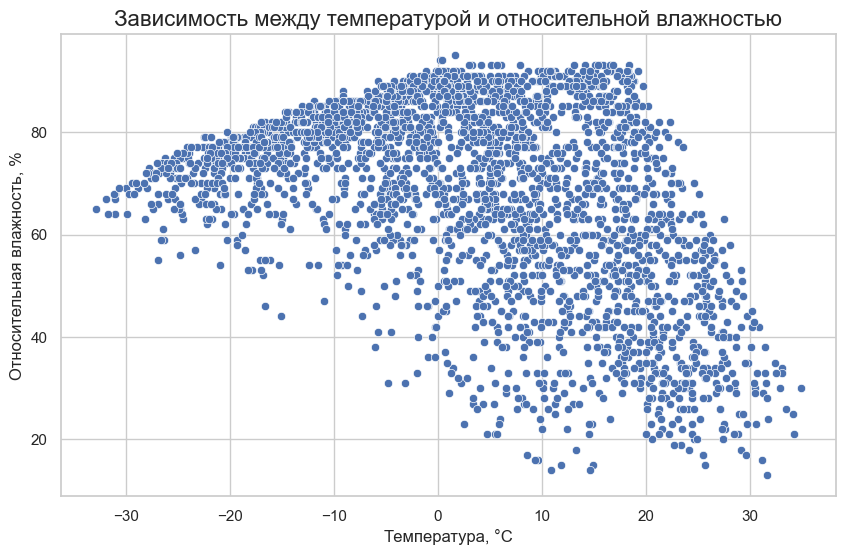

In [6]:
sns.scatterplot(data=df_weather, x='temperature', y='humidity')
plt.title('Зависимость между температурой и относительной влажностью', fontsize=16)
plt.xlabel('Температура, °C', fontsize=12)
plt.ylabel('Относительная влажность, %', fontsize=12)
plt.show()

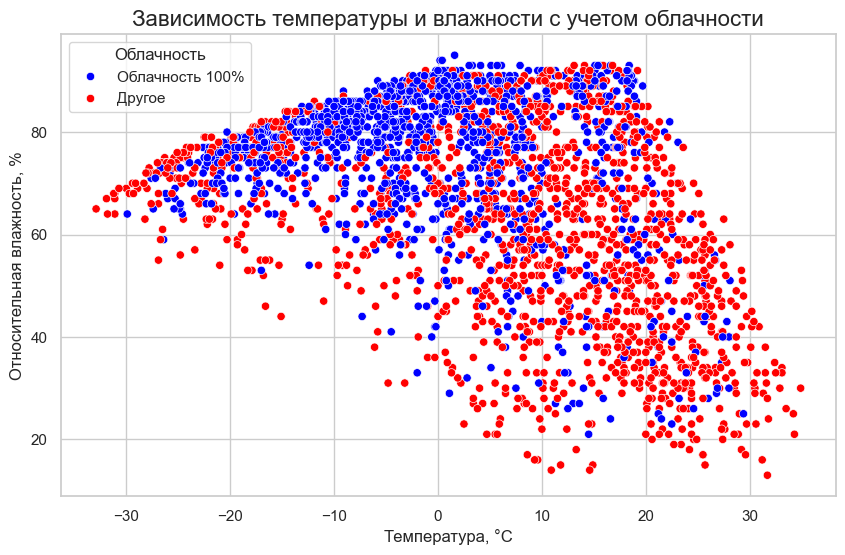

In [7]:

df_weather['cloudiness_category'] = np.where(df_weather['cloudiness'] == 100, 'Облачность 100%', 'Другое')

sns.scatterplot(data=df_weather, x='temperature', y='humidity', hue='cloudiness_category', palette={'Облачность 100%': 'blue', 'Другое': 'red'})
plt.title('Зависимость температуры и влажности с учетом облачности', fontsize=16)
plt.xlabel('Температура, °C', fontsize=12)
plt.ylabel('Относительная влажность, %', fontsize=12)
plt.legend(title='Облачность')
plt.show()

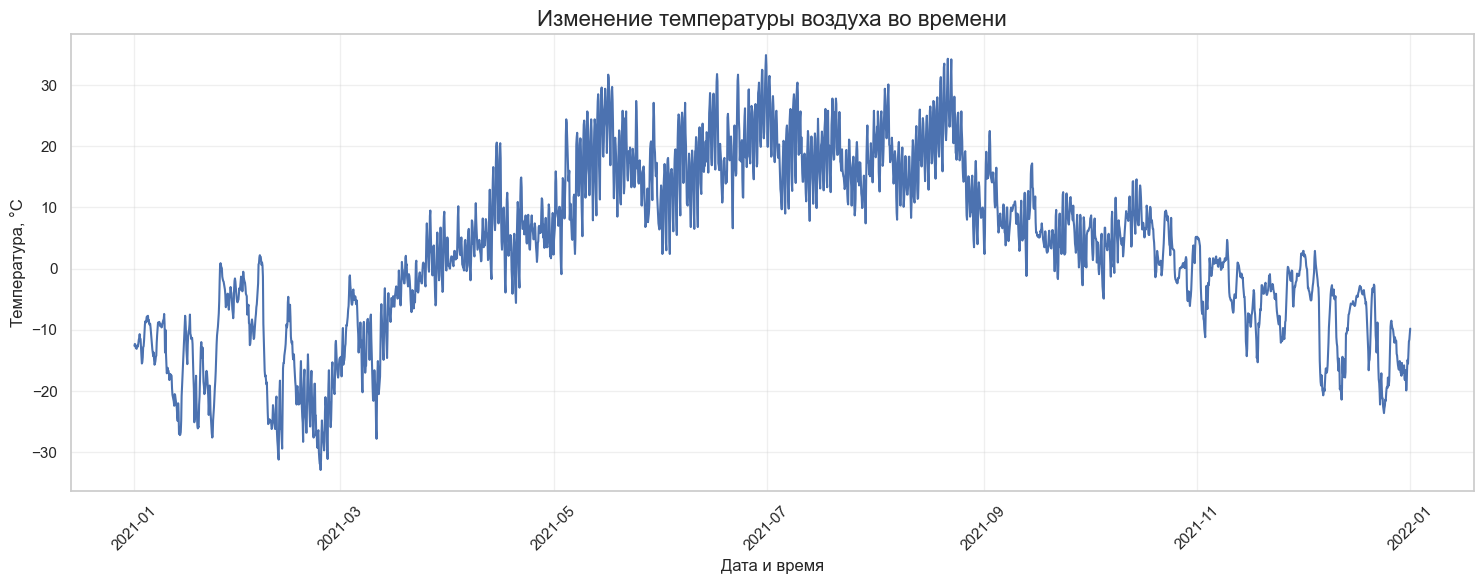

In [8]:
plt.figure(figsize=(15,6))
plt.plot(df_weather['time'], df_weather['temperature'])
plt.title('Изменение температуры воздуха во времени', fontsize=16)
plt.xlabel('Дата и время', fontsize=12)
plt.ylabel('Температура, °C', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

C:\Users\xolead\AppData\Local\Temp\ipykernel_8940\1997247784.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=monthly_avg_temp, x='month', y='temperature',


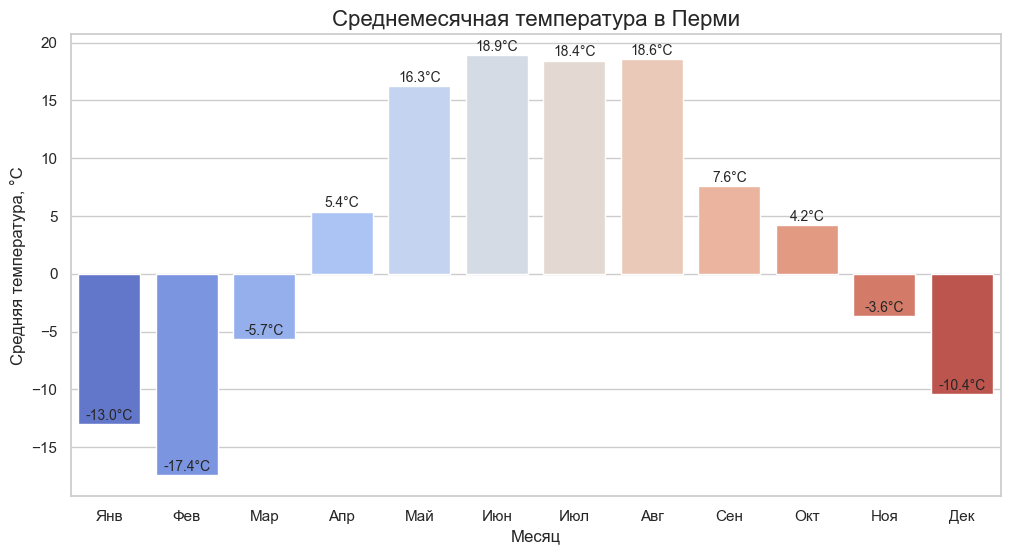

In [26]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=monthly_avg_temp, x='month', y='temperature', 
                 palette=sns.color_palette("coolwarm", len(monthly_avg_temp)))

# Добавляем подписи значений
for i, temp in enumerate(monthly_avg_temp['temperature']):
    ax.text(i, temp + 0.1, f'{temp:.1f}°C', 
            ha='center', va='bottom', fontsize=10)

plt.title('Среднемесячная температура в Перми', fontsize=16)
plt.xlabel('Месяц', fontsize=12)
plt.ylabel('Средняя температура, °C', fontsize=12)
plt.xticks(range(12), ['Янв', 'Фев', 'Мар', 'Апр', 'Май', 'Июн', 
                      'Июл', 'Авг', 'Сен', 'Окт', 'Ноя', 'Дек'])
plt.show()

cloudiness
100                                                                   1427
Облаков нет.                                                           364
70 – 80                                                                285
20–30                                                                  251
90  или более, но не 100%                                              222
40                                                                     111
60                                                                     106
50                                                                      83
10%  или менее, но не 0                                                 66
Небо не видно из-за тумана и/или других метеорологических явлений.       1
Name: count, dtype: int64


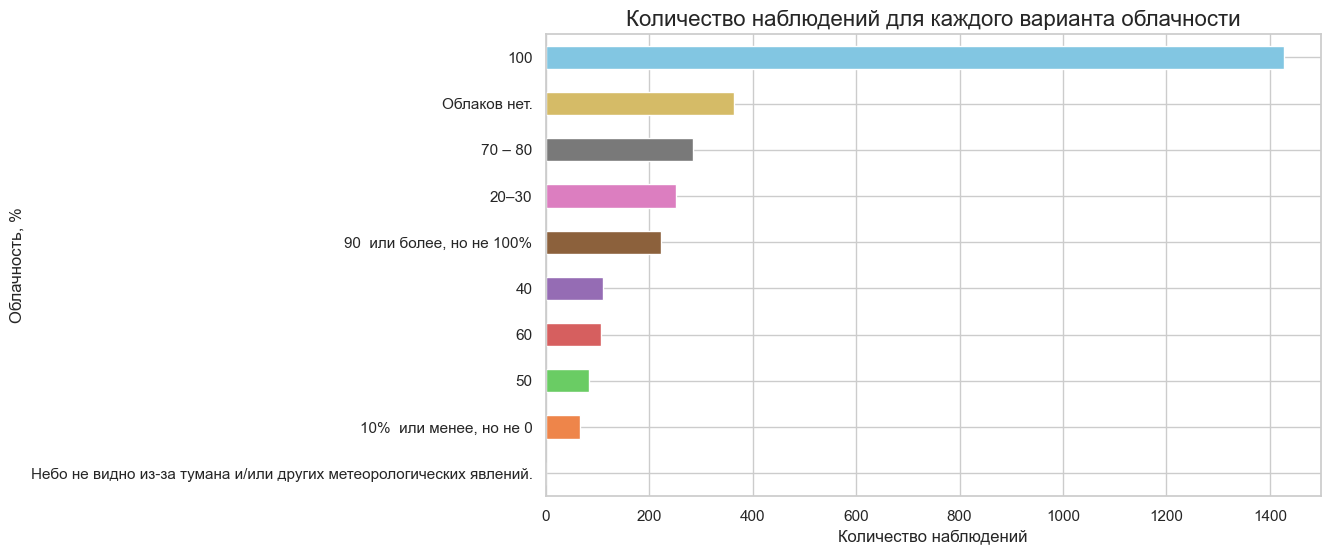

In [29]:
print(df_weather['cloudiness'].value_counts())

cloudiness_counts = df_weather['cloudiness'].value_counts().sort_values()

cloudiness_counts.plot(kind='barh', color=sns.color_palette('muted', len(cloudiness_counts)))
plt.title('Количество наблюдений для каждого варианта облачности', fontsize=16)
plt.xlabel('Количество наблюдений', fontsize=12)
plt.ylabel('Облачность, %', fontsize=12)
plt.show()

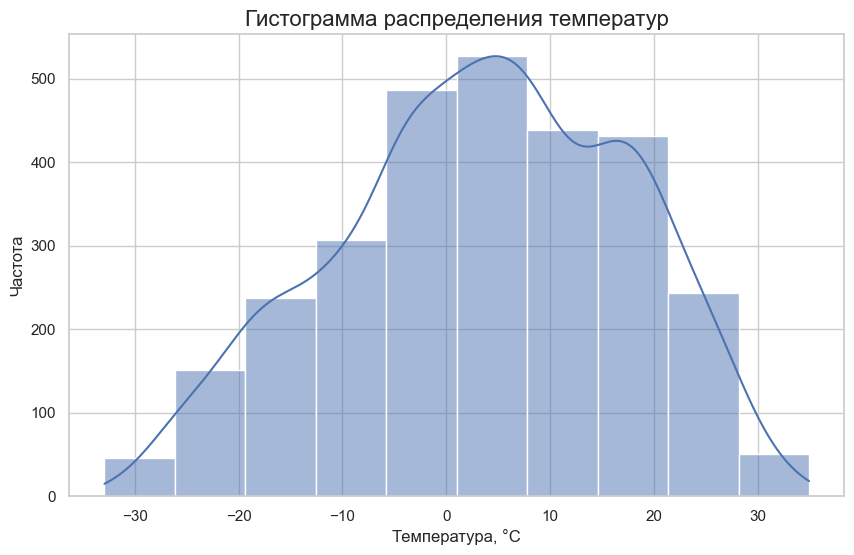

In [11]:
sns.histplot(data=df_weather, x='temperature', bins=10, kde=True)
plt.title('Гистограмма распределения температур', fontsize=16)
plt.xlabel('Температура, °C', fontsize=12)
plt.ylabel('Частота', fontsize=12)
plt.show()

C:\Users\xolead\AppData\Local\Temp\ipykernel_8940\3830187825.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_weather.dropna(subset=['visibility_group', 'pressure']),


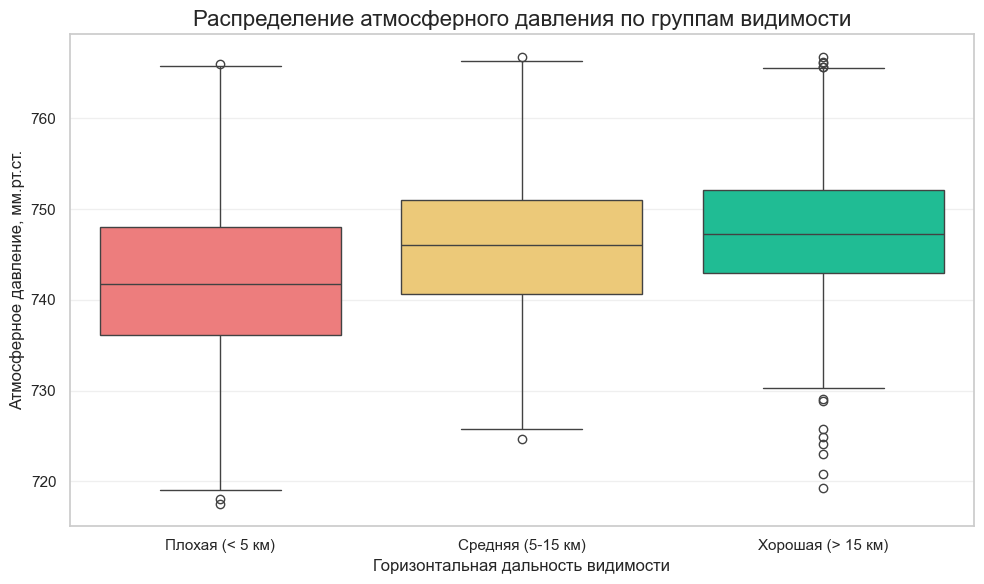

In [40]:
def categorize_visibility(visibility):
    if visibility <= 5:
        return 'Плохая (< 5 км)'
    elif visibility <= 15:
        return 'Средняя (5-15 км)'
    else:
        return 'Хорошая (> 15 км)'

df_weather['visibility_group'] = df_weather['visibility'].apply(categorize_visibility)

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_weather.dropna(subset=['visibility_group', 'pressure']), 
            x='visibility_group', y='pressure', 
            palette=['#ff6b6b', '#ffd166', '#06d6a0'])
plt.title('Распределение атмосферного давления по группам видимости', fontsize=16)
plt.xlabel('Горизонтальная дальность видимости', fontsize=12)
plt.ylabel('Атмосферное давление, мм.рт.ст.', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

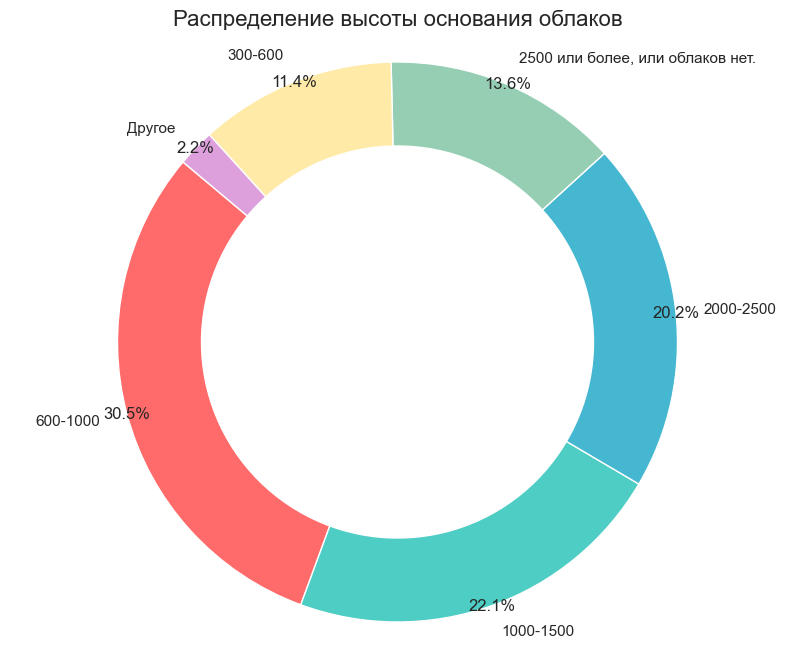

In [ ]:
height_counts = df_weather['cloud_height'].value_counts()

if len(height_counts) > 5:
    top_5 = height_counts.nlargest(5)
    others = pd.Series({'Другое': height_counts.iloc[5:].sum()})
    plot_data = pd.concat([top_5, others])
else:
    plot_data = height_counts

# Создаем цветовую палитру
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#DDA0DD', '#98D8C8', '#F7DC6F', '#BB8FCE', '#85C1E9']

plt.figure(figsize=(10, 8))
plt.pie(plot_data, labels=plot_data.index, autopct='%1.1f%%', startangle=140, 
        pctdistance=0.85, colors=colors[:len(plot_data)])

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Распределение высоты основания облаков', fontsize=16)
plt.axis('equal')
plt.show()